## Wearable Tech: Week 2 Assignment

## 1. Import Libraries and Data

In [1]:
# imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
#turns off warning for chained assignment since I am overwriting reference to original dataframe
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_rows', 30)

### Step 1

In [2]:
df = pd.read_csv("../Data/Soccer.csv", parse_dates=["Date"])
df.head()

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date
0,12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06
1,89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06
2,63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06
3,15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06
4,44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06


### Step 2

In [3]:
session_df = df.loc[df['Period.Name'] == "Session"]

session_df.head()

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date
0,12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06
1,89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06
2,63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06
3,15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06
4,44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06


### Step 3

In [4]:
session_df['Session.Duration'] = session_df['Total.Player.Load']/session_df['Player.Load.Per.Minute']
session_df.head(10)

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date,Session.Duration
0,12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06,18.054328
1,89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06,16.941335
2,63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06,16.143162
3,15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06,18.900662
4,44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06,18.310667
5,35,Session,F,315.51553,16.69335,0,0,0.00000,2019-08-06,18.900672
6,95,Session,F,325.23862,17.50760,219,0,169.52066,2019-08-06,18.576996
7,39,Session,D,239.91634,15.65591,0,0,0.00000,2019-08-06,15.324331
8,49,Session,F,223.56837,13.60788,213,0,186.40130,2019-08-06,16.429331
9,66,Session,M,249.47591,14.21178,235,0,171.52356,2019-08-06,17.554164


In [5]:
print(session_df.columns)    # this is optional


Index(['Player.Name', 'Period.Name', 'Position.Name', 'Total.Player.Load',
       'Player.Load.Per.Minute', 'Maximum.Heart.Rate', 'Minimum.Heart.Rate',
       'Avg.Heart.Rate', 'Date', 'Session.Duration'],
      dtype='object')


In [6]:
# this section is optional for learners...just cleans up the dataset

columns_to_keep = ['Date', 'Player.Name', 'Period.Name', 'Position.Name', 'Total.Player.Load','Session.Duration']

session_df = session_df[columns_to_keep]  
session_df

,Date,Player.Name,Period.Name,Position.Name,Total.Player.Load,Session.Duration
0,2019-08-06,12,Session,D,276.85373,18.054328
1,2019-08-06,89,Session,GK,238.00543,16.941335
2,2019-08-06,63,Session,F,231.84551,16.143162
3,2019-08-06,15,Session,D,355.02606,18.900662
4,2019-08-06,44,Session,D,318.82076,18.310667
...,...,...,...,...,...,...
9499,2019-11-24,23,Session,GK,185.24280,39.749968
9500,2019-11-24,21,Session,D,1364.75000,138.183361
9501,2019-11-24,43,Session,M,1294.72809,115.050023
9502,2019-11-24,91,Session,F,633.34450,91.195626


### Step 4

In [7]:
Rank_Total_PL = session_df.groupby(['Player.Name', 'Position.Name'])[['Total.Player.Load']].sum()
print("Total playerload per player sum from the entire season")


print(Rank_Total_PL.sort_values(by='Total.Player.Load', ascending = False))

Total playerload per player sum from the entire season
                           Total.Player.Load
Player.Name Position.Name                   
43          M                    61807.06587
62          F                    55455.84319
4           M                    54531.06541
21          D                    52448.84502
44          D                    45528.61318
66          M                    44035.16557
100         D                    43435.17877
39          D                    42966.83272
12          D                    42594.47149
52          D                    41966.27363
35          F                    39743.46043
86          M                    38332.92067
10          D                    35760.14918
63          F                    34497.65386
15          D                    32792.41598
18          D                    28582.29879
97          F                    28388.64588
49          F                    28331.33281
91          F                    27545.34959


### Step 5

In [8]:
session_df.nlargest(20, 'Total.Player.Load')

# Player 43 has 70% of the top 10 dates regarding total player load

,Date,Player.Name,Period.Name,Position.Name,Total.Player.Load,Session.Duration
8482,2019-11-08,43,Session,M,1755.08710,148.066633
9338,2019-11-22,43,Session,M,1701.65860,132.453449
4874,2019-09-19,62,Session,F,1695.69403,132.740540
4883,2019-09-19,43,Session,M,1672.69440,122.105177
4489,2019-09-13,43,Session,M,1649.17551,144.883878
5697,2019-09-29,4,Session,M,1641.06146,152.628626
3536,2019-09-01,43,Session,M,1635.75719,168.703635
5703,2019-09-29,43,Session,M,1617.42587,134.873157
8471,2019-11-08,62,Session,F,1576.30459,148.066684
5937,2019-10-03,4,Session,M,1565.28558,157.649922


### Step 6: Includes several steps -- though my coding is likely not efficient here

In [9]:
session_df=session_df.set_index('Player.Name')
session_df


,Date,Period.Name,Position.Name,Total.Player.Load,Session.Duration
Player.Name,,,,,
12,2019-08-06,Session,D,276.85373,18.054328
89,2019-08-06,Session,GK,238.00543,16.941335
63,2019-08-06,Session,F,231.84551,16.143162
15,2019-08-06,Session,D,355.02606,18.900662
44,2019-08-06,Session,D,318.82076,18.310667
...,...,...,...,...,...
23,2019-11-24,Session,GK,185.24280,39.749968
21,2019-11-24,Session,D,1364.75000,138.183361
43,2019-11-24,Session,M,1294.72809,115.050023


In [10]:
session_df=session_df.drop([98, 62, 89, 23, 71])
session_df


,Date,Period.Name,Position.Name,Total.Player.Load,Session.Duration
Player.Name,,,,,
12,2019-08-06,Session,D,276.85373,18.054328
63,2019-08-06,Session,F,231.84551,16.143162
15,2019-08-06,Session,D,355.02606,18.900662
44,2019-08-06,Session,D,318.82076,18.310667
35,2019-08-06,Session,F,315.51553,18.900672
...,...,...,...,...,...
100,2019-11-24,Session,D,1161.67722,128.466174
21,2019-11-24,Session,D,1364.75000,138.183361
43,2019-11-24,Session,M,1294.72809,115.050023


In [11]:
session_df=session_df.set_index('Date', append=True)
session_df.head()



,,Period.Name,Position.Name,Total.Player.Load,Session.Duration
Player.Name,Date,,,,
12,2019-08-06,Session,D,276.85373,18.054328
63,2019-08-06,Session,F,231.84551,16.143162
15,2019-08-06,Session,D,355.02606,18.900662
44,2019-08-06,Session,D,318.82076,18.310667
35,2019-08-06,Session,F,315.51553,18.900672


In [12]:
session_df.reset_index(level=['Player.Name'], inplace=True)
session_df

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Session.Duration
Date,,,,,
2019-08-06,12,Session,D,276.85373,18.054328
2019-08-06,63,Session,F,231.84551,16.143162
2019-08-06,15,Session,D,355.02606,18.900662
2019-08-06,44,Session,D,318.82076,18.310667
2019-08-06,35,Session,F,315.51553,18.900672
...,...,...,...,...,...
2019-11-24,100,Session,D,1161.67722,128.466174
2019-11-24,21,Session,D,1364.75000,138.183361
2019-11-24,43,Session,M,1294.72809,115.050023


In [13]:
session_df['Player.Name'] = session_df['Player.Name'].astype('object')
session_df 

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Session.Duration
Date,,,,,
2019-08-06,12,Session,D,276.85373,18.054328
2019-08-06,63,Session,F,231.84551,16.143162
2019-08-06,15,Session,D,355.02606,18.900662
2019-08-06,44,Session,D,318.82076,18.310667
2019-08-06,35,Session,F,315.51553,18.900672
...,...,...,...,...,...
2019-11-24,100,Session,D,1161.67722,128.466174
2019-11-24,21,Session,D,1364.75000,138.183361
2019-11-24,43,Session,M,1294.72809,115.050023


### Step 7 

Learners are asked to change the windows on the ACWR to 3 day (acute) and 21 day (chronic) windows.   (Player with highest cumulative player load is #43
)

In [14]:
df_43 = session_df.loc[session_df['Player.Name'] == 43] 
df_43 = df_43.resample('D').sum()
df_43 = df_43.fillna(0)
df_43.head()

,Total.Player.Load,Session.Duration
Date,,
2019-08-06,1384.29407,148.599858
2019-08-07,1231.07260,192.827240
2019-08-08,0.00000,0.000000
2019-08-09,1258.91826,163.980353
2019-08-10,614.87480,86.198288


In [15]:
df_43["Acute_PL"] = (df_43.loc[:,"Total.Player.Load"].rolling('3D', 3).sum())/3
df_43["Chronic_PL"] = (df_43.loc[:,"Total.Player.Load"].rolling('21D', 21).sum())/21
df_43["Acute:Chronic"] = df_43.loc[:,"Acute_PL"]/df_43.loc[:,"Chronic_PL"]
df_43.head()

,Total.Player.Load,Session.Duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-08-06,1384.29407,148.599858,NaN,NaN,NaN
2019-08-07,1231.07260,192.827240,NaN,NaN,NaN
2019-08-08,0.00000,0.000000,871.788890,NaN,NaN
2019-08-09,1258.91826,163.980353,829.996953,NaN,NaN
2019-08-10,614.87480,86.198288,624.597687,NaN,NaN


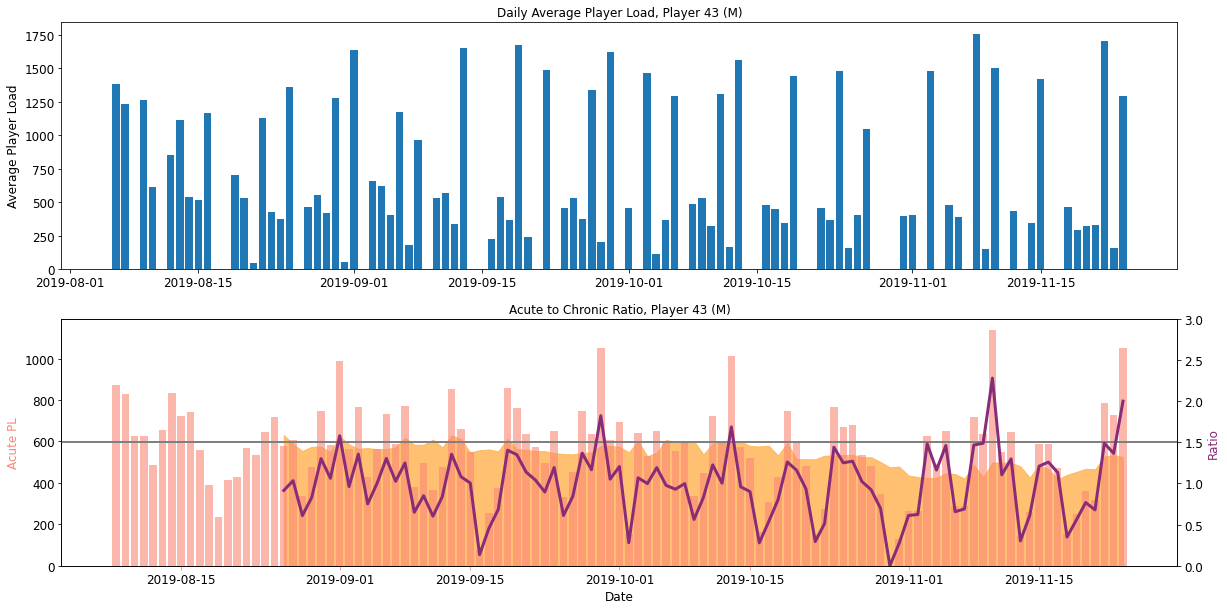

In [16]:
fig, axs = plt.subplots(2,figsize=(20, 10))

axs[0].bar(df_43.index, df_43["Total.Player.Load"])
#axs[0].set_xlabel("Date", fontsize=12)
axs[0].tick_params(axis='x', labelsize=12,)
axs[0].set_ylabel('Average Player Load', fontsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_title("Daily Average Player Load, Player 43 (M)", fontsize=12)

color='#FA8775'
axs[1].set_xlabel("Date", fontsize=12)
axs[1].tick_params(axis='x', labelsize=12, color=color)
axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
axs[1].bar(df_43.index, df_43["Acute_PL"], color=color, alpha=0.6)
axs[1].tick_params(axis='y', labelsize=12)
color='#FFB14E'
axs[1].fill_between(df_43.index, df_43["Chronic_PL"], color=color, alpha=0.8)
axs[1] = plt.gca()
axs[1].set_title("Acute to Chronic Ratio, Player 43 (M)", fontsize=12)
axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

color='#882C78'
axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
axs1.plot(df_43.index, df_43["Acute:Chronic"], color=color, linewidth=3.0)
axs1.tick_params(axis='y', labelsize=12)
axs1 = plt.gca()

# To see how the acute to chronic workload ratio drops over the first 21 days, 
# comment out this line by adding a '#' in front of the line
axs1.set_ylim([0,3.0])

axs1.axhline(y=1.5,c="gray",linewidth=2,zorder=0)

### Step 8 Entire team ACWR

In [17]:
df_all = session_df.groupby("Date").sum()
df_all = df_all.resample('D').sum()
df_all = df_all.fillna(0)

df_all["Acute_PL"] = (df_all.loc[:,"Total.Player.Load"].rolling('3D', 3).sum())/3
df_all["Chronic_PL"] = (df_all.loc[:,"Total.Player.Load"].rolling('21D', 21).sum())/21
df_all["Acute:Chronic"] = df_all.loc[:,"Acute_PL"]/df_all.loc[:,"Chronic_PL"]
df_all.head()

,Total.Player.Load,Session.Duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-08-06,21457.62648,2718.800956,NaN,NaN,NaN
2019-08-07,21576.70582,3960.461380,NaN,NaN,NaN
2019-08-08,0.00000,0.000000,14344.777433,NaN,NaN
2019-08-09,19715.55092,3173.360914,13764.085580,NaN,NaN
2019-08-10,8707.56628,1653.143806,9474.372400,NaN,NaN


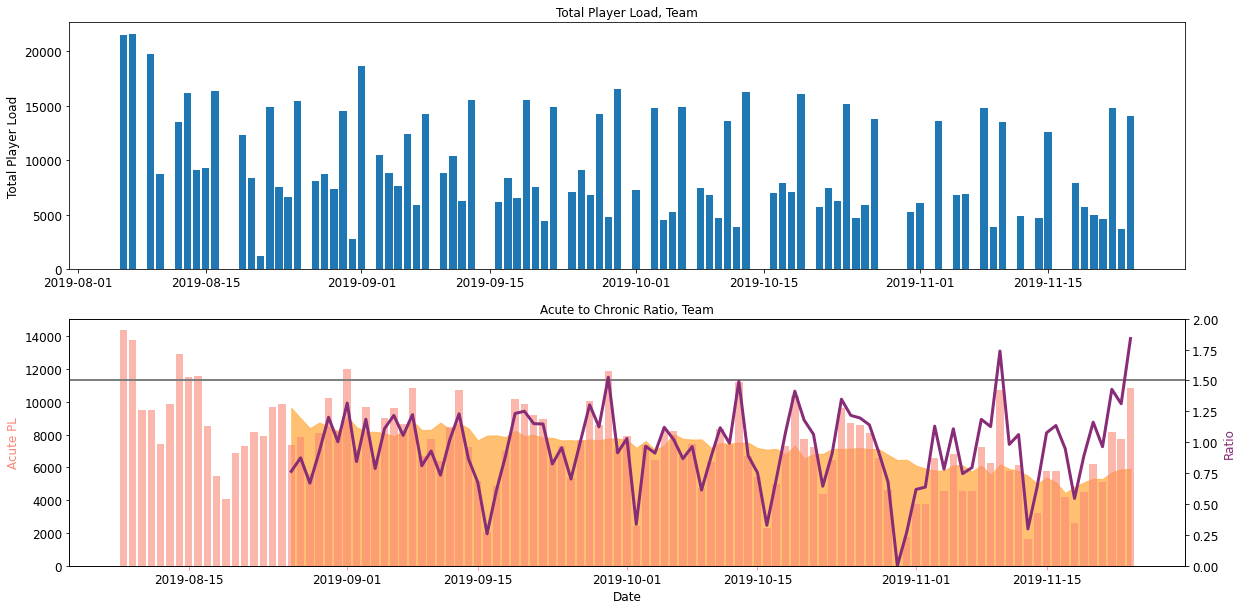

In [18]:
fig, axs = plt.subplots(2,figsize=(20, 10))

axs[0].bar(df_all.index, df_all["Total.Player.Load"])
#axs[0].set_xlabel("Date", fontsize=12)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_ylabel('Total Player Load', fontsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_title("Total Player Load, Team", fontsize=12)

color='#FA8775'
axs[1].set_xlabel("Date", fontsize=12)
axs[1].tick_params(axis='x', labelsize=12, color=color)
axs[1].set_ylabel('Acute PL', color=color, fontsize=12)
axs[1].bar(df_all.index, df_all["Acute_PL"], color=color, alpha=0.6)
axs[1].tick_params(axis='y', labelsize=12)

color='#FFB14E'
axs[1].fill_between(df_all.index, df_all["Chronic_PL"], color=color, alpha=0.8)
axs[1] = plt.gca()
axs[1].set_title("Acute to Chronic Ratio, Team", fontsize=12)
axs1 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

color='#882C78'
axs1.set_ylabel('Ratio', fontsize=12, color=color)  # we already handled the x-label with ax1
axs1.plot(df_all.index, df_all["Acute:Chronic"], color=color, linewidth=3.0)
axs1.tick_params(axis='y', labelsize=12)
axs1 = plt.gca()

axs1.set_ylim([0,2.0])

axs1.axhline(y=1.5,c="gray",linewidth=2,zorder=0)

### Step 9

In [19]:
df_all.nlargest(5, 'Acute:Chronic')

,Total.Player.Load,Session.Duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-11-24,14027.23956,1558.522129,10856.481493,5902.242050,1.839383
2019-11-10,13527.89556,1552.761600,10746.631557,6181.182352,1.738605
2019-09-29,16510.51763,1955.542138,11844.918730,7760.283862,1.526351
2019-10-13,16228.67178,1933.122200,11224.619850,7513.621718,1.493903
2019-11-22,14833.59227,1680.056468,8150.606677,5705.682994,1.428507


### Step 10

In [20]:
df_all.nsmallest(50, 'Session.Duration')
# determine how many days of rest the team had (days with zero) Answer = 26
# determine what day the team had the lowest total session duration: Aug 21st. (day before first real game)

,Total.Player.Load,Session.Duration,Acute_PL,Chronic_PL,Acute:Chronic
Date,,,,,
2019-08-08,0.00000,0.000000,14344.777433,NaN,NaN
2019-08-11,0.00000,0.000000,9474.372400,NaN,NaN
2019-08-17,0.00000,0.000000,8544.453713,NaN,NaN
2019-08-18,0.00000,0.000000,5454.673143,NaN,NaN
2019-08-26,0.00000,0.000000,7361.054340,9631.933594,0.764234
...,...,...,...,...,...
2019-10-05,5285.40036,1042.633011,8213.273557,7327.068464,1.120949
2019-11-19,5677.10753,1043.887005,4515.243710,5081.013905,0.888650
2019-10-08,7419.11446,1046.000076,7426.851873,7695.638506,0.965073


Date           Time         At        Opponent             Location              Tournament   Result

Aug 16 (Fri)   7:00 PM      Home      Iowa (ex)            Ann Arbor, Mich.                   L 0-1 

Aug 22 (Thu)   7:30 PM      Home      Marshall             Ann Arbor, Mich.                   W 5-0 

Aug 25 (Sun)   2:00 PM      Home      Utah Valley          Ann Arbor, Mich.                   W 2-1 

Aug 30 (Fri)   5:00 PM      Home      Florida Gulf Coast   Ann Arbor, Mich.                   W 2-0 

Sep 1 (Sun)    2:30 PM CT   Away      Marquette            Milwaukee, Wis.                    L 0-1 

Sep 6 (Fri)    7:30 PM      Home      Notre Dame           Ann Arbor, Mich.                   L 0-1 

Sep 8 (Sun)    2:00 PM      Home      Bowling Green        Ann Arbor, Mich.                   W 2-0 

Sep 13 (Fri)   7:00 PM PT   Away      Washington State     Pullman, Wash.                     W 2-1 

Sep 19 (Thu)   6:00 PM      Away      Penn State           State College, Pa.                 W 1-0 

Sep 22 (Sun)   2:00 PM      Away      Ohio State           Columbus, Ohio                     W 2-1 

Sep 27 (Fri)   7:00 PM      Home      Purdue               Ann Arbor, Mich.                   W 2-1 

Sep 29 (Sun)   1:00 PM      Home      Indiana              Ann Arbor, Mich.                   T 0-0 

Oct 3 (Thu)    8:00 PM CT   Away      Wisconsin            Madison, Wis.                      L 0-2 

Oct 6 (Sun)    1:00 PM      Home      Nebraska             Ann Arbor, Mich.                   W 4-1 

Oct 11 (Fri)   7:00 PM CT   Away      Illinois             Champaign, Ill.                    W 4-1 

Oct 13 (Sun)   1:00 PM CT   Away      Northwestern         Evanston, Ill.                     W 2-1 

Oct 19 (Sat)   5:00 PM      Away      Michigan State       East Lansing, Mich.                W 3-2 

Oct 24 (Thu)   7:00 PM      Home      Rutgers              Ann Arbor, Mich.                   L 0-1 

Oct 27 (Sun)   1:00 PM      Home      Maryland             Ann Arbor, Mich.                   W 4-1 

Nov 3 (Sun)    1:00 PM      Home      Maryland             Ann Arbor, Mich.                   W 3-0 

Nov 8 (Fri)    1:30 PM      Away      Rutgers              Piscataway, N.J.                   W 2-1 

Nov 10 (Sun)   Noon         Neutral   Penn State           Piscataway, N.J.                   L 1-2 

Nov 15 (Fri)   7:00 PM      Home      Bowling Green        Ann Arbor, Mich.                   W 2-1 

Nov 22 (Fri)   3:00 PM      Neutral   Texas Tech           Chapel Hill, N.C.                  W 3-2 

Nov 24 (Sun)   1:00 PM      Away      North Carolina       Chapel Hill, N.C.                  L 0-4